# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/datasets/real_estate_data.csv', sep='\t')

In [95]:
#посмотрим общую информацию по таблице и кол-во ненулевых значений
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [96]:
#переименуем столбец cityCenters_nearest
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [97]:
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


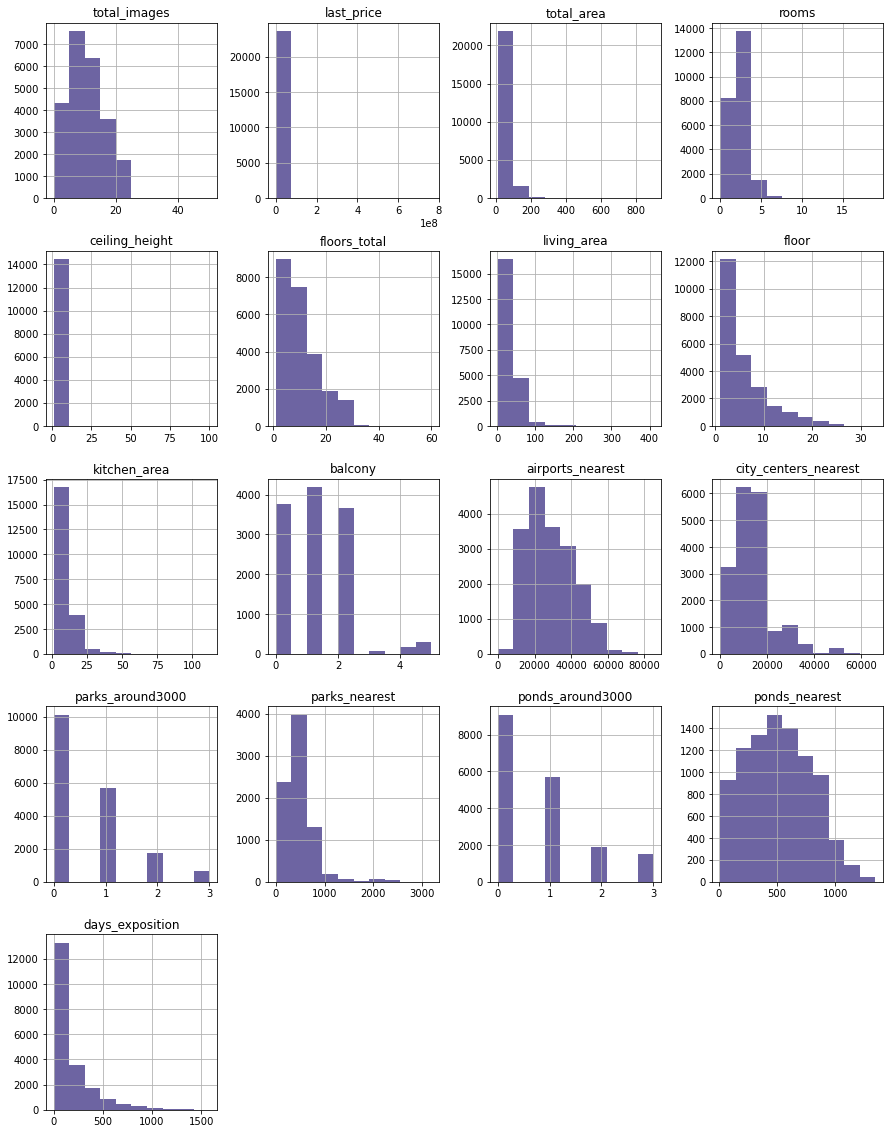

In [98]:
data.hist(figsize = (15, 20), color='darkslateblue', alpha=.8);

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"


***Вывод:***   
Всего у нас 23699 записи. 
Для целого ряда столбцов есть некорректный тип данных. Наблюдаются аномальные значения.  
Это нужно исправить.

### Предобработка данных

In [99]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;" 
     
***Вывод:***     
       
_first_day_exposition_ - тип object - должен быть тип datetime, уберем время,тк его нет   
_ceiling_height_ - нулевые значения   
_floors_total_ - должен быть тип int, т.к. количество этажей - целое значение + нулевые значения   
_is_apartment_ - должен быть тип bool + нулевые значения   
_living_area_ - нулевые значения   
_kitchen_area_ - нулевые значения   
_balcony_ - нулевые значения   
_locality_name_  - нулевые значения   
_airports_nearest_ - нулевые значения   
_cityCenters_nearest_ - нулевые значения   
_parks_around3000_ - тип должен быть int + нулевые значения   
_parks_nearest_  - нулевые значения, 
_ponds_around3000_ - тип должен быть int + нулевые значения   
_ponds_nearest_ - нулевые значения   
_days_exposition_ - тип должен быть int + нулевые значения 

In [100]:
#заменим пропущенные значения на 0. Приводим в целочисленный тип количество балконов, так как имеются строковые данные используем метод loc. 
data['balcony'] = data['balcony'].fillna(0).astype('int')

In [101]:
# заменим пропущенные значения на нет, данные должны быть type bool
data['is_apartment'] = data['is_apartment'].fillna(value = 'False').astype(bool)

In [102]:
# заменим пропущенные значения на 0. Приводим в целочисленный тип расстояние до парка. 
data['parks_around3000'] = data['parks_around3000'].fillna(9999)
data['parks_around3000'] = data['parks_around3000'].astype('int')
# заменим пропущенные значения на 0. Приводим в целочисленный тип расстояние до аэропорта.
data['airports_nearest'] = data['airports_nearest'].fillna(9999).astype('int')
data['airports_nearest'] = data['airports_nearest'].astype('int')

In [103]:
# заменим пропуски в days_exposition и заменим тип данных. Все пропущенные значения были заменены на медиану.
data['days_exposition'] = data['days_exposition'].fillna(9999)
data['days_exposition'] = data['days_exposition'].astype('int')

In [104]:
#переводим столбец с датой в формат даты без времени, т.к. время не указано
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

In [105]:
#изменим цену на тип int для удобства просмотра
data['last_price'] = data['last_price'].astype('int')

In [106]:
#удаляем пропущенные строки и меняем тип на int. 
#Заменяем пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены. 
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype('int')

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"

***Вывод:***  
Пропуски в столбцах is_apartment, 'balcony', 'parks_around3000', 'ponds_around3000' носят в себе случайный характер.  
Значения могли не поставить если, к примеру, "нет" балкона, недвижимость не является апартаментами или нет ни водоемов, ни парков рядом.
     

In [107]:
#удаляем записи, где отсутствует локация
data.dropna(subset = ['locality_name'], inplace = True)
#вызовем уникальные значения столбца 'locality_name'
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [108]:
#замена неявных дубликатов 
data['locality_name']=data['locality_name'].str.replace('ё','е')
data['locality_name']=data['locality_name'].str.replace('поселок городского типа','поселок')
data['locality_name']=data['locality_name'].str.replace('коттеджный поселок','поселок')
data['locality_name']=data['locality_name'].str.replace('городской поселок','поселок')
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [109]:
#проверяем столбец высота потолков, в столбце явно есть выбросы. Min и max значения имеют большую разницу
data['ceiling_height'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

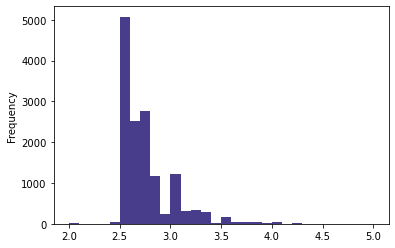

In [110]:
#Форма гистограммы отличается от нормального распределения, у которого симметричная форма колокола с пиком посередине.
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5), color='darkslateblue')

In [111]:
#отсортируем столбец, где высота выше 4 и выведем на экран последние 20 строк. Видим, что есть высота потолков 25.0м и выше. Необходимо обработать аномальные данные
data[data['ceiling_height'] > 4].sort_values('ceiling_height').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000,43.0,2019-03-18,2,25.0,5,29.0,3,False,...,NaN,0,Санкт-Петербург,27054,8033.0,1,540.0,0.0,NaN,12
355,17,3600000,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,NaN,2,Гатчина,9999,NaN,9999,NaN,NaN,NaN,259
6246,6,3300000,44.4,2019-03-25,2,25.0,5,31.3,5,True,...,5.7,0,Кронштадт,68923,50649.0,1,417.0,2.0,73.0,9999
14382,9,1700000,35.0,2015-12-04,1,25.0,5,20.0,2,False,...,8.0,1,поселок Новый Свет,9999,NaN,9999,NaN,NaN,NaN,206
11285,0,1950000,37.0,2019-03-20,1,25.0,5,17.0,4,False,...,9.0,2,Луга,9999,NaN,9999,NaN,NaN,NaN,18
4643,0,4300000,45.0,2018-02-01,2,25.0,9,30.0,2,True,...,7.0,1,Санкт-Петербург,12016,13256.0,1,658.0,1.0,331.0,181
9379,5,3950000,42.0,2017-03-26,3,25.0,5,30.0,2,True,...,5.2,0,Санкт-Петербург,11647,13581.0,0,NaN,0.0,NaN,9999
5669,4,4400000,50.0,2017-08-08,2,26.0,9,21.3,3,True,...,7.0,2,Санкт-Петербург,28981,10912.0,1,305.0,0.0,NaN,267
5807,17,8150000,80.0,2019-01-09,2,27.0,36,41.0,13,True,...,12.0,5,Санкт-Петербург,18732,20444.0,0,NaN,3.0,80.0,38
5246,0,2500000,54.0,2017-10-13,2,27.0,5,30.0,3,True,...,9.0,2,деревня Мины,9999,NaN,9999,NaN,NaN,NaN,540


In [112]:
#редактируем аномальные значения высоты потолков выше 4х и ниже 2х. Я посмотрела среднее и медиану они примерно одинаковые, решила заполнить медианным значением
data.loc[(data['ceiling_height'] < 2.0) | (data['ceiling_height'] > 4), 'ceiling_height'] = data['ceiling_height'].median()

In [113]:
#заменяем пустые значения высоты потолков на зашлушки значения
data['ceiling_height'] = data['ceiling_height'].fillna(9999)
data['ceiling_height'] = data['ceiling_height'].astype('int')

In [114]:
#заменяем пустые значения жилой площади на среднеарифметческую долю
living_ratio = data['living_area'].mean() / data['total_area'].mean()
data['living_area'] = data['living_area'].fillna(living_ratio * data['total_area'])

In [115]:
#заменяем пустые значения площади кухни на среднеарифметческую долю
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_ratio * data['total_area'])

In [116]:
#выясним, сколько пропущено значений расстояния до центра для квартир из Санкт-Петербурга. Эти данные впоследствии понадобятся для анализа.
round(len(data[(data['locality_name'] == 'Санкт-Петербург') & (data['city_centers_nearest'].isna())]) / len(data.reset_index(drop=True).query('locality_name == "Санкт-Петербург"')), 3)
#заменяем пустые значения расстояния до центра города на медианные значения и переводим в км
data['city_centers_nearest'] = data['city_centers_nearest'].fillna(data['city_centers_nearest'].median())

In [117]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest            0
city_centers_nearest        0
parks_around3000            0
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition             0
dtype: int64

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"

***Вывод:***  
Пропущенные значения и замена типа данных

***Высота потолков:***   
     было пропущено большое количество значений, при этом часть значений были введены вручную с ошибкой (25 м вместо 2,5 м и т.д.). Добавила условие: высота потолков не может быть больше 4, а также меньше 2,5 м (в данных существуют значения в 1,75 м и даже в 1 м). Все пропущенные значения обработаны: была сделана замена на медиану.   
     
***Число этажей в доме:***   
     Данный признак будет использоваться в анализе, при этом точно заменить пропущенные значения не представляется возможным, поэтому все строки с пропущенными значениями удалены.   
     
***Жилая площадь и площадь кухни:***   
     Построила зависимость на основе гипотезы: если нам известна общая площадь недвижимости, то мы можем оценить и рассчитать среднеарифметическую долю S кухни к среднеарифтической общей S квартиры. Тоже самое сделала со значениями жилой площади.   
     
***Число балконов:***   
     Предполагаю, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю.   
     
***Название населенного пункта:***   
     Все строки с пропущенными значениями удалены, так как этот признак будет использоваться при дальнейшем анализе. Необходимо ввести условие об обязательном заполнении данного признака в объявлении.   
     
***Расстояние до центра города:***   
     Из всех квартир Санкт-Петербурга отсутствует информация по расстоянию до центра для 0,4% квартир. Заменила пропущенные значения на медиану.   
     
***Апартаменты:***   
   Предполагаю, что отсутствие значение (bool) свидетельствует о том, что это не апартаменты. Заменяем на нет.   
     
***Расстояние до аэропорта:***   
     понадобится в исследовании, поэтому заполним значения 0, так как высчитать точное значение не представляется возможным.
     
***Наличие водоемов и парков, а также расстояние до ближайшего водоема:***   
     пропущенные значения в этих признаках оставлены без изменений, так как они не будут использованы в текущем исследовании.   
     
***Длительность размещения объявления:***   
     Все пропущенные значения были заменены на медиану.   

***Тип признака Время публикации*** объявления был заменен со строчного на временной, удалено время.

In [118]:
#добавляем столбец со стоимостью квадратного метра (m_price) и приводим его в целочисленный тип
data['m_price'] = data['last_price'] / data['total_area']
data['m_price'] = data['m_price'].astype('int')

In [119]:
#создаем словарь со значениями, которую будет изменять
data['weekday_exposition'] = data['first_day_exposition']
data['weekday_exposition'] = data['first_day_exposition'].dt.dayofweek


In [120]:
#создаем словарь со значениями, которую будет изменять
data['month_exposition'] = data['first_day_exposition']
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

In [121]:
#напишем функцию типа по этажам, используя метод apply применим к каждой строке датафрейма через axis = 1
def floor_func(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data[['floor', 'floors_total']].apply(floor_func, axis = 1)

In [122]:
#расстояние до центра города  в метрах переводим в км, округляем и добавляем новый столбец
#data.loc[(data['city_centers_nearest']/1000), 'city_centers_nearest'] = data['city_centers_nearest_km']
data['city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round().astype('int')
data['city_centers_nearest_km'].head(20)

0     16
1     19
2     14
3      7
4      8
5     13
6     19
7     12
8     13
9     15
10    14
11    52
12    13
13    33
14    31
15    14
16    11
17    15
18    11
19    13
Name: city_centers_nearest_km, dtype: int64

### Исследовательский анализ данных

In [123]:
#напишем функцию, получающую на вход название признака, и возвращающая границы "усов"
def det_whiskers(column):
    stat = data[column].describe()
    
    #межквартильный размах
    iqr = stat[6] - stat[4]
    
    #левый и правый "ус"    
    left_whisker = round(stat[4] - 1.5 * iqr, 2)
    right_whisker = round(stat[6] + 1.5 * iqr, 2)

    #левый "ус" не должен быть меньше минимального значения
    if left_whisker < stat[3]: left_whisker = stat[3] 
        
    #правый "ус" не должен быть больше максимального значения
    if right_whisker > stat[7]: right_whisker = stat[7]
        
    return [left_whisker, right_whisker]

In [124]:
#изучим общую площадь квартир
det_whiskers('total_area')

[12.0, 114.25]

In [125]:
data['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

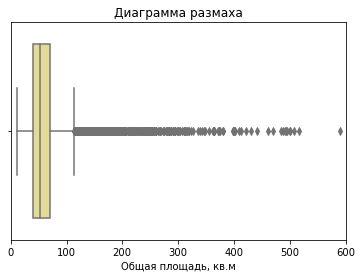

In [126]:
#построим диаграмму размаха, ограничив площадь 170 кв.м
sns.boxplot(x=data['total_area'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Общая площадь, кв.м')
plt.xlim(0, 600)
plt.show()

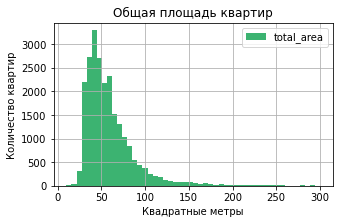

Наибольшие по общей площади варианты:
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
15016    500.0
5893     500.0
12401    495.0
Name: total_area, dtype: float64


'Аномальные значения составляют 5.3% от всей выборки'

In [127]:
data.plot(y = 'total_area', kind = 'hist', bins=50, range=(10,300), grid=True, color='mediumseagreen', figsize = (5,3))
plt.title('Общая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по общей площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))
#распределение данных нормальное
#проверим действительно ли их немного, зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('total_area')

In [128]:
#Добавим столбец, описывающим аномально большую площадь недвижимости.
data['anomalies_total_area'] = data['total_area'] > det_whiskers('total_area')[1]

In [129]:
#изучим жилую площадь квартир
det_whiskers('living_area')

[2.0, 76.75]

In [130]:
data['living_area'].describe()

count    23565.000000
mean        34.592277
std         22.373679
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

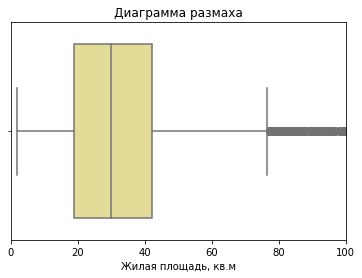

In [131]:
#построим диаграмму размаха, ограничив площадь 100 кв.м
sns.boxplot(x=data['living_area'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Жилая площадь, кв.м')
plt.xlim(0, 100)
plt.show()

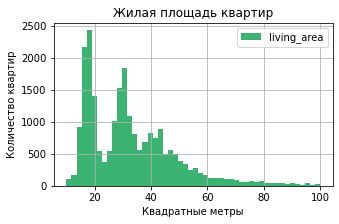

Наибольшие по жилой площади варианты:
19540    409.700000
5358     409.000000
3117     360.410721
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
5893     285.586942
Name: living_area, dtype: float64


'Аномальные значения составляют 3.7% от всей выборки'

In [132]:
data.plot(y = 'living_area', kind = 'hist', bins=50, range=(10,100), grid=True, color='mediumseagreen', figsize = (5,3))
plt.title('Жилая площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))
#распределение данных нормальное
#проверим долю аномальных значений, зададим функцию, вычисляющую долю аномальных значений, есть выбросы но они не сильно влияют на данные
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('living_area')

In [133]:
#Добавим столбец, описывающим аномально большую жилую площадь недвижимости.
data['anomalies_living_area'] = data['living_area'] > det_whiskers('living_area')[1]

In [134]:
#изучим площадь кухни
det_whiskers('kitchen_area')

[1.3, 19.5]

In [135]:
data['kitchen_area'].describe()

count    23565.000000
mean        10.499898
std          6.037750
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

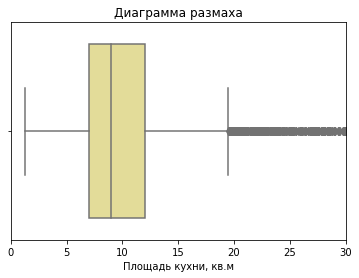

In [136]:
#построим диаграмму размаха, ограничив площадь 30 кв.м
sns.boxplot(x=data['kitchen_area'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Площадь кухни, кв.м')
plt.xlim(0, 30)
plt.show()

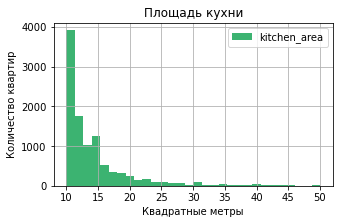

Наибольшие по площади кухни варианты:
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
15016     87.537299
10867     87.200000
9826      86.504359
492       77.000000
Name: kitchen_area, dtype: float64


'Аномальные значения составляют 5.5% от всей выборки'

In [137]:
data.plot(y = 'kitchen_area', kind = 'hist', bins=30, range=(10,50), color='mediumseagreen', grid=True, figsize = (5,3))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))
#есть выбросы, проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('kitchen_area')


In [138]:
#Добавим столбец, описывающим аномально большую площадь кухни
data['anomalies_kitchen_area'] = data['kitchen_area'] > det_whiskers('kitchen_area')[1]

In [139]:
#изучим цену объекта
det_whiskers('last_price')

[12190.0, 11875000.0]

In [140]:
data['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

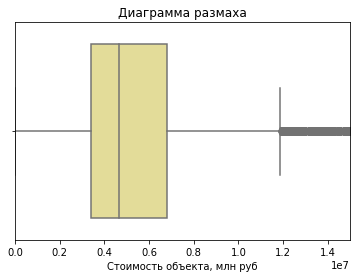

In [141]:
#построим диаграмму размаха, ограничив стоимость 15000000 руб
sns.boxplot(x=data['last_price'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Стоимость объекта, млн руб')
plt.xlim(0, 15000000)
plt.show()

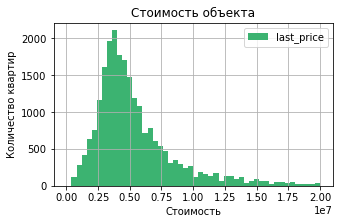

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


'Аномальные значения составляют 8.7% от всей выборки'

In [142]:
data.plot(y = 'last_price', kind = 'hist', bins=50, range=(1,20000000), grid=True, color='mediumseagreen',  figsize = (5,3))
plt.title('Стоимость объекта')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))
#есть выбросы, проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('last_price')

In [143]:
#Добавим столбец, описывающим аномально большую стоимость
data['too_expensive'] = data['last_price'] > det_whiskers('last_price')[1]

In [144]:
#изучим количество комнат
det_whiskers('rooms')

[0.0, 6.0]

In [145]:
data['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

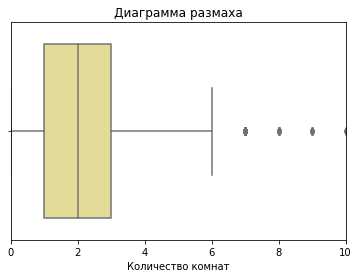

In [146]:
#построим диаграмму размаха, ограничив количество 10
sns.boxplot(x=data['rooms'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Количество комнат')
plt.xlim(0, 10)
plt.show()

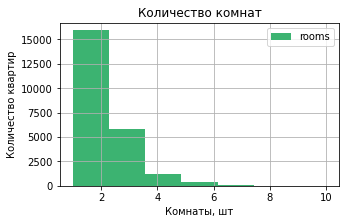

Наибольшие по количеству комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


'Аномальные значения составляют 0.4% от всей выборки'

In [147]:
data.plot(y = 'rooms', kind = 'hist', bins=7, range=(1,10), grid=True, color='mediumseagreen', figsize = (5,3))
plt.title('Количество комнат')
plt.xlabel('Комнаты, шт')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по количеству комнат варианты:')
print(data['rooms'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('rooms')

In [148]:
#создадим столбец с аномально большим количеством комнат
data['anomalies_rooms'] = data['rooms'] > det_whiskers('rooms')[1]

In [149]:
#изучим высоту потолков
det_whiskers('ceiling_height')

[2.0, 9999.0]

In [150]:
data['ceiling_height'].describe()

count    23565.000000
mean      3855.823212
std       4865.657280
min          2.000000
25%          2.000000
50%          2.000000
75%       9999.000000
max       9999.000000
Name: ceiling_height, dtype: float64

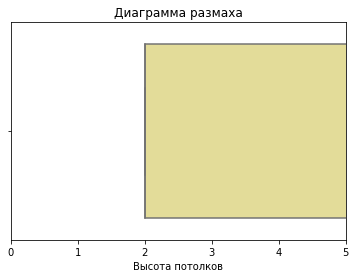

In [151]:
#строим гистограмму размаха
sns.boxplot(x=data['ceiling_height'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Высота потолков')
plt.xlim(0, 5)
plt.show()

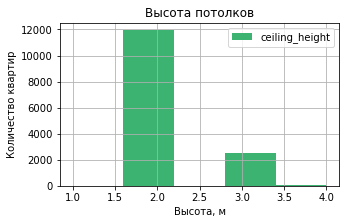

Наибольшие по высоте потолков варианты:
7853     9999
9083     9999
9042     9999
9044     9999
19132    9999
9048     9999
9053     9999
9055     9999
9056     9999
9057     9999
Name: ceiling_height, dtype: int64


'Аномальные значения составляют 0.0% от всей выборки'

In [152]:
data.plot(y='ceiling_height', kind='hist', bins=5, range=(1, 4), grid=True, color='mediumseagreen', figsize=(5,3))
plt.title('Высота потолков')
plt.xlabel('Высота, м')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(data['ceiling_height'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('ceiling_height')

In [153]:
#Добавим столбец, описывающий аномально большую высоту потолков
data['anomalies_ceiling_height'] = data['ceiling_height'] > det_whiskers('ceiling_height')[1]

In [154]:
#изучим столбец floor
det_whiskers('floor')

[1.0, 17.0]

In [155]:
data['floor'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

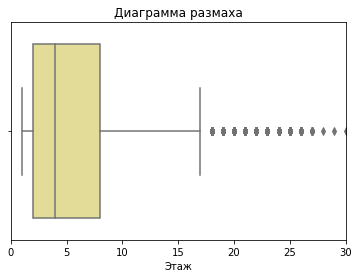

In [156]:
#строим гистограмму размаха
sns.boxplot(x=data['floor'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Этаж')
plt.xlim(0,30)
plt.show()

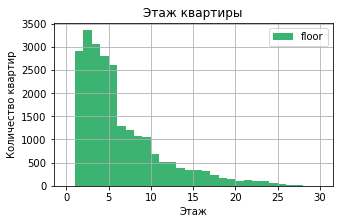

Наибольшие по этажу варианты:
18218    33
11575    32
18629    31
1917     30
11079    29
397      28
12888    27
16644    27
23292    27
4091     27
Name: floor, dtype: int64


'Аномальные значения составляют 3.8% от всей выборки'

In [157]:
data.plot(y='floor', kind='hist', bins=30, range=(0,30), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(data['floor'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('floor')

In [158]:
#добавим столбец с аномальным значением этажа квартиры
data['anomalies_floor'] = data['floor'] > det_whiskers('floor')[1]

In [159]:
#изучим тип этажа квартиры
data['floor_type'].describe()

count      23565
unique         3
top       другой
freq       17326
Name: floor_type, dtype: object

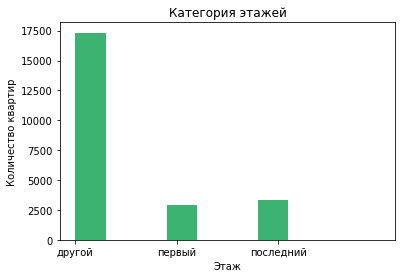

Наибольшие по категории этажей варианты:
6813     последний
17303    последний
3054     последний
8675     последний
17284    последний
3060     последний
3063     последний
8669     последний
3067     последний
17290    последний
Name: floor_type, dtype: object


In [160]:
plt.hist(data['floor_type'], bins=10, range=(0,3), color='mediumseagreen')
plt.title('Категория этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по категории этажей варианты:')
print(data['floor_type'].sort_values(ascending=False).head(10))

In [161]:
#изучим столбец floor
det_whiskers('floors_total')

[1.0, 32.5]

In [162]:
data['floors_total'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

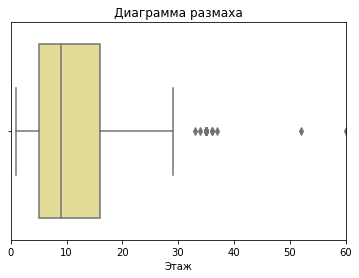

In [163]:
#строим гистограмму размаха
sns.boxplot(x=data['floors_total'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Этаж')
plt.xlim(0,60)
plt.show()

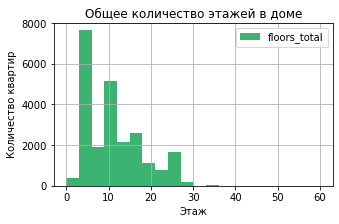

Наибольшие по этажу варианты:
2253     60
16731    52
16934    37
5807     36
11079    36
397      36
13975    35
2966     35
9186     35
1917     35
Name: floors_total, dtype: int64


'Аномальные значения составляют 0.1% от всей выборки'

In [164]:
data.plot(y='floors_total', kind='hist', bins=20, range=(0,60), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Общее количество этажей в доме')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по этажу варианты:')
print(data['floors_total'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('floors_total')

In [165]:
#изучим столбец расстояние до центра города
det_whiskers('city_centers_nearest')

[4482.0, 21690.0]

In [166]:
data['city_centers_nearest'].describe()

count    23565.000000
mean     13936.770019
std       7555.477329
min        181.000000
25%      10935.000000
50%      13096.500000
75%      15237.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

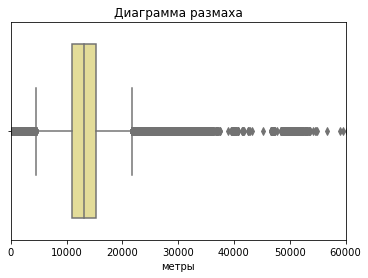

In [167]:
#строим гистограмму размаха
sns.boxplot(x=data['city_centers_nearest'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('метры')
plt.xlim(0,60000)
plt.show()

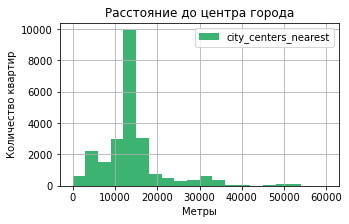

Наибольшие по расстоянию до центра варианты:
9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
Name: city_centers_nearest, dtype: float64


'Аномальные значения составляют 10.0% от всей выборки'

In [168]:
data.plot(y='city_centers_nearest', kind='hist', bins=20, range=(0,60000), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до центра варианты:')
print(data['city_centers_nearest'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('city_centers_nearest')

In [169]:
#добавим столбец с аномальным значением расстояния до центра города
data['city_centers_anomalies'] = data['city_centers_nearest'] > det_whiskers('city_centers_nearest')[1]

In [170]:
#изучим столбец расстояние до близжайшего аэропорта
det_whiskers('airports_nearest')

[0.0, 70595.5]

In [171]:
data['airports_nearest'].describe()

count    23565.000000
mean     24390.521748
std      13623.150976
min          0.000000
25%      10143.000000
50%      21854.000000
75%      34324.000000
max      84869.000000
Name: airports_nearest, dtype: float64

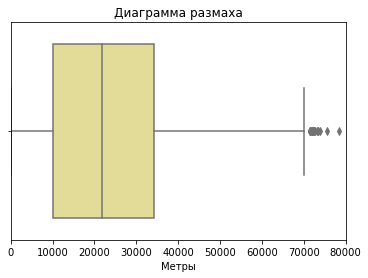

In [172]:
#строим диаграмму размаха
sns.boxplot(x=data['airports_nearest'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Метры')
plt.xlim(0, 80000)
plt.show()

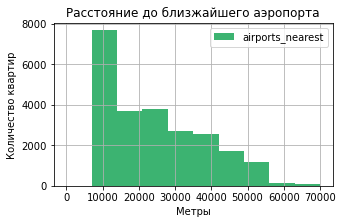

Наибольшие по расстоянию до близжайшего аэропорта варианты:
9640     84869
5340     84853
577      84665
20746    84006
5218     83758
18884    81607
2974     81355
4441     78527
939      75646
376      73827
Name: airports_nearest, dtype: int64


'Аномальные значения составляют 0.1% от всей выборки'

In [173]:
data.plot(y='airports_nearest', kind='hist', bins=10, range=(0,70000), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Расстояние до близжайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до близжайшего аэропорта варианты:')
print(data['airports_nearest'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('airports_nearest')

In [174]:
#изучим столбец расстояние до ближайшего парка
det_whiskers('parks_around3000')

[0.0, 7.5]

In [175]:
data['parks_around3000'].describe()

count    23565.000000
mean      2334.205304
std       4229.335224
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max       9999.000000
Name: parks_around3000, dtype: float64

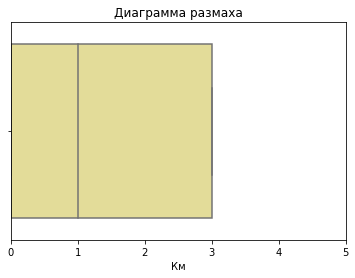

In [176]:
#строим диаграмму размаха
sns.boxplot(x=data['parks_around3000'], color='khaki')
plt.title('Диаграмма размаха')
plt.xlabel('Км')
plt.xlim(0, 5)
plt.show()

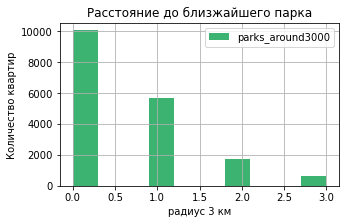

Наибольшие по расстоянию до близжайшего парка варианты:
23698    9999
4590     9999
13634    9999
13635    9999
13646    9999
13648    9999
13650    9999
13653    9999
13660    9999
4574     9999
Name: parks_around3000, dtype: int64


'Аномальные значения составляют 23.3% от всей выборки'

In [177]:
data.plot(y='parks_around3000', kind='hist', bins=10, range=(0,3), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Расстояние до близжайшего парка')
plt.xlabel('радиус 3 км')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по расстоянию до близжайшего парка варианты:')
print(data['parks_around3000'].sort_values(ascending=False).head(10))
#проверим долю аномальных значений
#зададим функцию, вычисляющую долю аномальных значений
def print_anomalies_ratio(column):
    return 'Аномальные значения составляют {:.1%}'. format(len(data.loc[data[column] > det_whiskers(column)[1]]) / len(data)) + ' от всей выборки'
print_anomalies_ratio('parks_around3000')

In [178]:
#добавим столбец с аномальным значением расстояния до центра города
data['parks_around3000_anomalies'] = data['parks_around3000'] > det_whiskers('parks_around3000')[1]

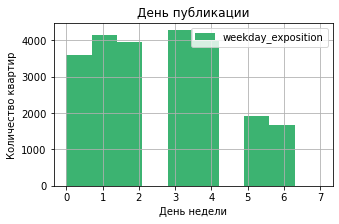

Наибольшие по дню публикации варианты:
0        Четверг
6194     Четверг
17995    Четверг
6186     Четверг
18015    Четверг
18018    Четверг
18019    Четверг
18023    Четверг
6170     Четверг
6167     Четверг
Name: weekday_exposition, dtype: object


In [179]:
data.plot(y='weekday_exposition', kind='hist', bins=10, range=(0,7), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('День публикации')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по дню публикации варианты:')

data = data.replace({'weekday_exposition':{0:'Понедельник', 1:'Вторник', 2:'Среда', 3:'Четверг', 4:'Пятница', 5:'Суббота', 6:'Воскресенье'}})
print(data['weekday_exposition'].sort_values(ascending=False).head(10))


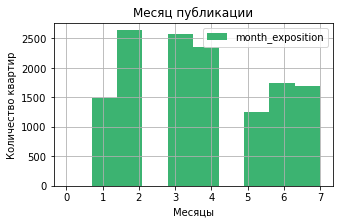

Наибольшие по месяцу публикации варианты:
11850    Январь
2772     Январь
1806     Январь
9315     Январь
1073     Январь
1072     Январь
4923     Январь
16324    Январь
9326     Январь
7380     Январь
Name: month_exposition, dtype: object


In [180]:
data.plot(y='month_exposition', kind='hist', bins=10, range=(0,7), grid=True, color='mediumseagreen', figsize=(5, 3))
plt.title('Месяц публикации')
plt.xlabel('Месяцы')
plt.ylabel('Количество квартир')
plt.show()

print('Наибольшие по месяцу публикации варианты:')
data = data.replace({'month_exposition':{1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}})
print(data['month_exposition'].sort_values(ascending=False).head(10))

In [181]:
#Уберем редкие и выбивающиеся значения
good_data = data[(data['anomalies_total_area'] == False) & 
     (data['anomalies_living_area'] == False) &
     (data['anomalies_kitchen_area'] == False) &
     (data['anomalies_ceiling_height'] == False) &
     (data['too_expensive'] == False) &
    (data['anomalies_rooms'] == False)].reset_index(drop=True)

print('Доля чистых значений составила: {:.1%}'. format(len(good_data) / len(data)))


Доля чистых значений составила: 88.6%


<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"

***Вывод:***   

_Средняя квартира, выставленная на продажу, имеет следующие характеристики:_   
это 2-комнатная квартира площадью 52 кв. м с потолками 2,65 м, с жилой площадью 30 кв. м., площадью кухни 9кв.м., на 4 этаже, проданная за 3 месяца (95 дней) по цене 4,6 млн рублей.   

_Аномальные характеристики квартир из представленного набора данных:_   

8-комнатная квартира или больше с площадью более 150 кв. м, потолками менее 2,5 м или более 4 м, по цене более 15 млн рублей, проданная более чем за 14 месяцев (428 дней).   
     
_Количество комнат_   
В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно и подозрительно. Даже при объединении нескольких квартир в одну это подозрительно. Возможно, это отдельный дом.

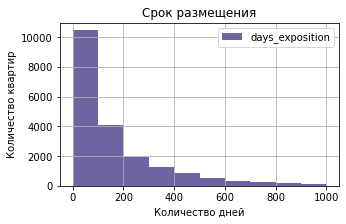

Наибольшие по сроку размещения варианты:
0       9999
9742    9999
9842    9999
9837    9999
9819    9999
9816    9999
9785    9999
9782    9999
9777    9999
9752    9999
Name: days_exposition, dtype: int64
Медианное значения срока размещения: 124.0 дней
Среднее значения срока размещения: 1501.9252705283259 дней


count    23565.000000
mean      1501.925271
std       3356.852644
min          1.000000
25%         45.000000
50%        124.000000
75%        390.000000
max       9999.000000
Name: days_exposition, dtype: float64

In [186]:
data.plot(y='days_exposition', kind='hist', bins=10, range=(0,1000), grid=True, color='darkslateblue', figsize=(5, 3), alpha=.8)
plt.title('Срок размещения')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по сроку размещения варианты:')
print(data['days_exposition'].sort_values(ascending=False).head(10))

print('Медианное значения срока размещения:', data['days_exposition'].median(), 'дней')
print('Среднее значения срока размещения:', data['days_exposition'].mean(), 'дней')
data['days_exposition'].describe()

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"

***Вывод:***


Медианное время продажи - 95 дней. Среднее время продажи - 169 дней.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.




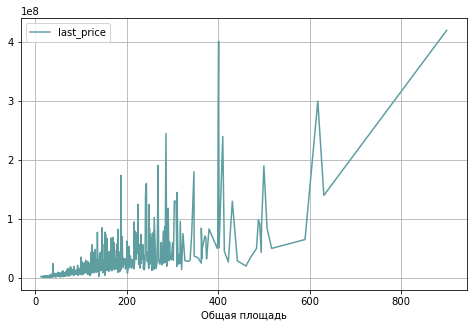

Корреляция цены и общей площади: 

            last_price  total_area
last_price    1.000000    0.739123
total_area    0.739123    1.000000 



In [187]:
#зависимость цены от площади 
(data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='-', color='cadetblue', figsize=(8, 5)))
plt.xlabel('Общая площадь')
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

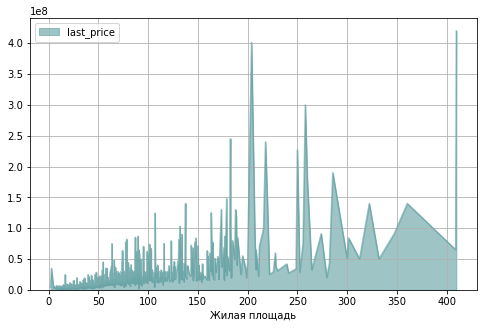

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.626853
living_area    0.626853     1.000000 



In [188]:
#зависимость цены от жилой площади 
(data.pivot_table(index='living_area', values='last_price').plot(grid=True, kind='area', color='cadetblue', alpha=0.6, figsize=(8, 5)))
plt.xlabel('Жилая площадь')
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')


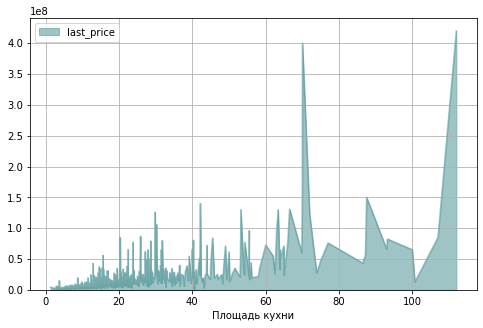

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.308049
last_price        0.308049    1.000000 



In [189]:
#зависимость цены от площади кухни
(data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='-', kind='area', color='cadetblue', alpha=.6, figsize=(8, 5)))
plt.xlabel('Площадь кухни')
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')


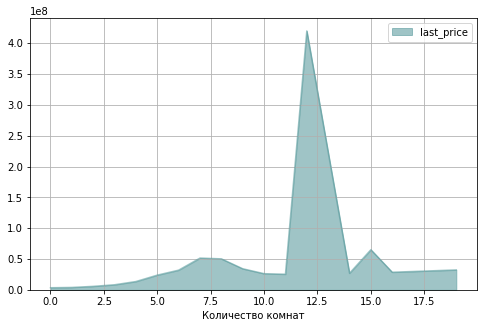

Корреляция цены и количества комнат: 

            last_price     rooms
last_price    1.000000  0.442934
rooms         0.442934  1.000000 



In [190]:
#зависимость цены от количества комнат
(data.pivot_table(index='rooms', values='last_price').plot(grid=True, alpha=.6, kind='area', color='cadetblue', figsize=(8, 5)))
plt.xlabel('Количество комнат')
plt.show()
print('Корреляция цены и количества комнат:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

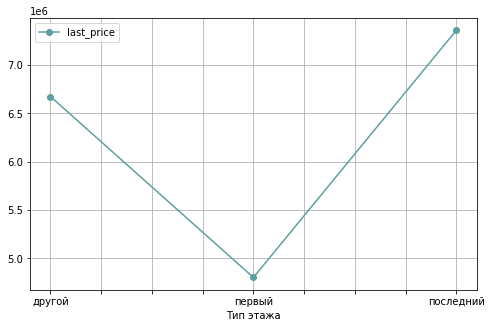

Корреляция цены и типа этажа: 

            last_price
last_price         1.0 



In [191]:
#зависимость цены от типа этажа
(data.pivot_table(index='floor_type', values='last_price').plot(grid=True, style='o-', color='cadetblue', figsize=(8, 5)))
plt.xlabel('Тип этажа')
plt.show()
print('Корреляция цены и типа этажа:','\n')
print(data.pivot_table(index='floor', values=['floor_type', 'last_price']).corr(),'\n')

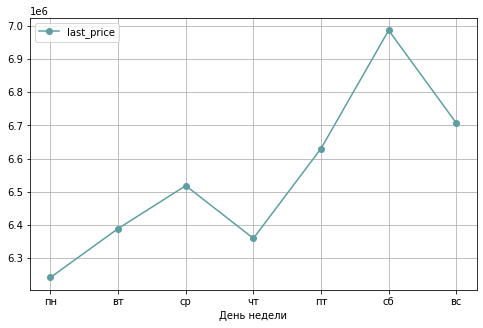

Корреляция цены и дня недели публикации: 

            last_price
last_price         1.0 



In [192]:
#зависимость цены от дня недели публикации
ax = data.pivot_table(index='weekday_exposition', values='last_price').sort_index().plot(grid=True, style='o-', color='cadetblue', figsize=(8, 5))
ax.set_xticks(list(range(7)))
ax.set_xticklabels(['пн', 'вт', 'ср', 'чт', 'пт', 'сб', 'вс'])
plt.xlabel('День недели')
plt.show()

print('Корреляция цены и дня недели публикации:','\n')
print(data.pivot_table(index='floor', values=['weekday_exposition', 'last_price']).corr(),'\n')

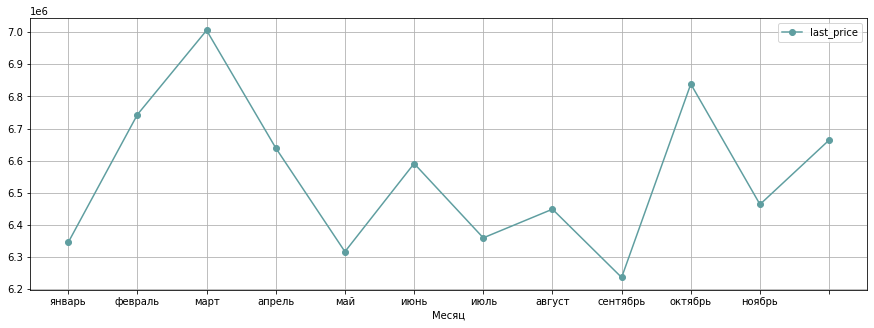

In [193]:
#зависимость цены от месяца публикации
ax = data.pivot_table(index='month_exposition', values='last_price').sort_index().plot(grid=True, style='o-', color='cadetblue', figsize=(15, 5))
ax.set_xticks(list(range(12)))
ax.set_xticklabels(['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', ''])
plt.xlabel('Месяц')
plt.show()

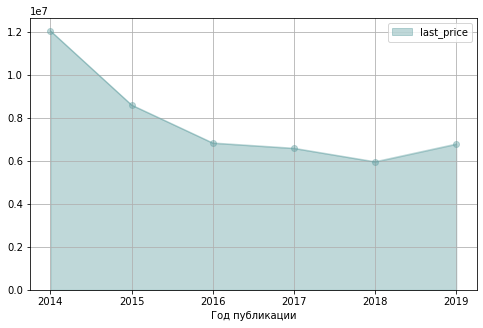

Корреляция цены и года публикации: 

                 last_price  year_exposition
last_price         1.000000        -0.055089
year_exposition   -0.055089         1.000000 



In [194]:
#зависимость цены от года публикации
(data.pivot_table(index='year_exposition', values='last_price').plot(grid=True, kind='area', style='o-', color='cadetblue', alpha=.4, figsize=(8, 5)))
plt.xlabel('Год публикации')
plt.show()
print('Корреляция цены и года публикации:','\n')
print(data.pivot_table(index='floor', values=['year_exposition', 'last_price']).corr(),'\n')

In [195]:
top_ten = data['locality_name'].value_counts().head(10)
top_m_price = data.query('locality_name in (@top_ten.index)').pivot_table(values='m_price', index='locality_name')
top_m_price = top_m_price.astype(int)
top_m_price.sort_values('m_price', ascending=False)

,m_price
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85629
поселок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


[Text(0, 0, 'Санкт-Петербург'),
 Text(1, 0, 'Пушкин'),
 Text(2, 0, 'деревня Кудрово'),
 Text(3, 0, 'поселок Парголово'),
 Text(4, 0, 'поселок Мурино'),
 Text(5, 0, 'поселок Шушары'),
 Text(6, 0, 'Колпино'),
 Text(7, 0, 'Гатчина'),
 Text(8, 0, 'Всеволожск'),
 Text(9, 0, 'Выборг')]

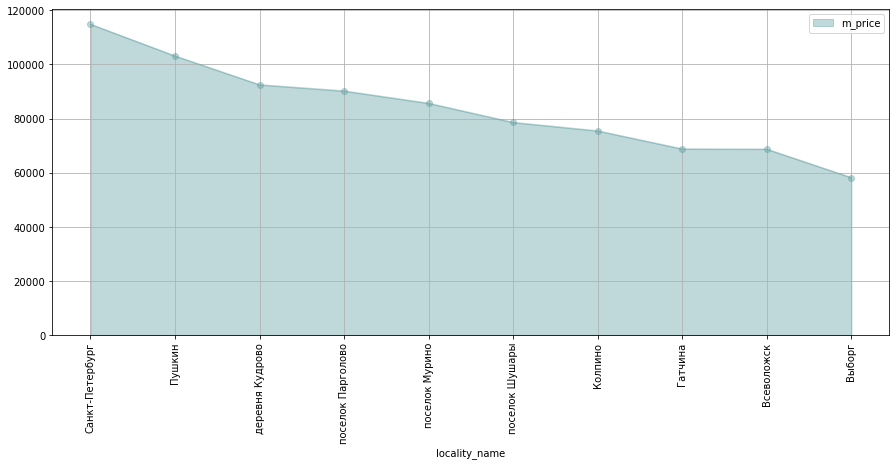

In [196]:
top_ten = data['locality_name'].value_counts().head(10)
top_m_price = data.query('locality_name in (@top_ten.index)').pivot_table(values='m_price', index='locality_name')
top_m_price = top_m_price.astype(int)
top_m_price = top_m_price.sort_values('m_price', ascending=False)
ax = (data.query('locality_name in (@top_ten.index)').pivot_table(values='m_price', index='locality_name').sort_values(by='m_price', ascending=False)).plot(grid=True, kind='area', style='o-', color='cadetblue', alpha=.4, figsize=(15, 6))
ax.set_xticks(list(range(len(top_m_price.index.tolist()))))
ax.set_xticklabels(top_m_price.index.tolist(), rotation=90)

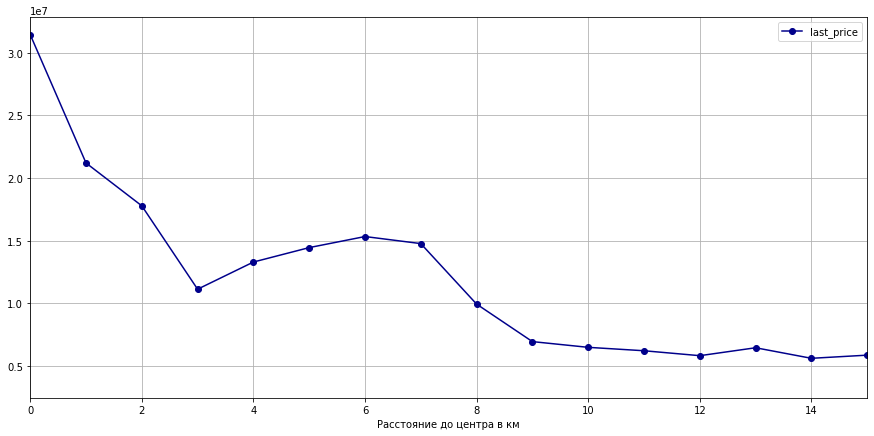

In [197]:
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(15, 7), color='darkblue')
)
plt.xlabel('Расстояние до центра в км')
plt.show()

Площадь (медиана): 55 

Площадь в центре (медиана): 79 

Площадь (среднее): 65 

Площадь в центре (среднее): 93 



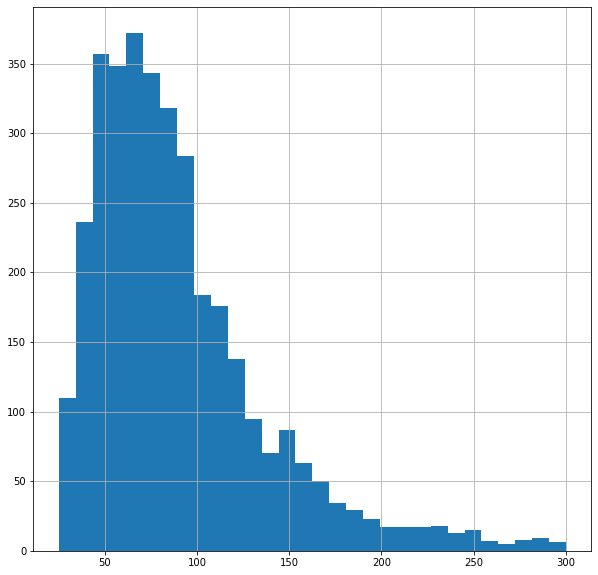

In [198]:
spb_center = data.query('(locality_name == "Санкт-Петербург") & (city_centers_nearest_km <= 7)')


# Изучаем площадь
print('Площадь (медиана):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (среднее):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

In [199]:
# Изучаем высоту потолков
print('Высота потолков (медиана):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (среднее):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean(),'\n')

Высота потолков (медиана): 2.0 

Высота потолков в центре (медиана): 3.0 

Высота потолков (среднее): 3550.3751836943325 

Высота потолков в центре (среднее): 3506.2160318362708 



In [200]:
# Изучаем площадь кухни
print('Площадь кухни (медиана):', data.query('locality_name == "Санкт-Петербург"')['kitchen_area'].median(),'\n')
print('Площадь кухни в центре (медиана):', spb_center['kitchen_area'].median(),'\n')
print('Площадь кухни (среднее):', data.query('locality_name == "Санкт-Петербург"')['kitchen_area'].mean(),'\n')
print('Площадь кухни в центре (среднее):', spb_center['kitchen_area'].mean(),'\n')

Площадь кухни (медиана): 9.716640241289976 

Площадь кухни в центре (медиана): 12.0 

Площадь кухни (среднее): 11.136470241591287 

Площадь кухни в центре (среднее): 14.743361865428248 



<div style="background-color:orange; text-align:center; vertical-align: middle; padding:40px 0;"
 

Судя, по резкости изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 7 километров.   
Высоты потолков в центре ниже на 44 см, связано это скорее с низко-этажным строительством в историческом центре.
Площадь кухни в центре в среднем больше на 3,61 метра.

### Общий вывод

<div style="background-color:lemonchiffon; text-align:center; vertical-align: middle; padding:40px 0;"

     
     
Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади, тоже самое и с жилой площадью. Есть небольшая корреляция от площади кухни, чем больше кухня тем дороже. 

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже. 
     
Чем ближе к центру города, тем квартиры дороже, число комнат и этаж квартиры (чем ближе к центру, тем эти факторы весомее). Чем дальше от центра города, тем в среднем квартира будет стоить дешевле: в среднем разница в стоимости между первым и восьмым километром от центра может достигать 2 млн руб.  
     
_Зависимость от дня, месяца и года_   
День недели: дороже всего проданы квартиры, опубликованные в субботу, дешевле всего - в понедельник.
Месяц: дороже всего квартиры, продающиеся с февраля по март, дешевле всего - с августа и в сентябре.
Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.
     
Вжное замечание: необходимо ввести ограничения на ввод данных о высоте потолков: допущено множество ручных ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.), а также обязательный ввод локации. 